===
Week4_class.Rmd
Requires: fpp, forecast packages
===

Most of this code is adapted from the code available with the FPP book
First let's look at how to implement simple exponential smoothing (SES)




Loading required package: fpp
Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: fma
Loading required package: tseries
Loading required package: expsmooth
Loading required package: lmtest


[1] "forecast"


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(x = oildata, h = 3) 

  Smoothing parameters:
    alpha = 0.8921 

  Initial states:
    l = 447.4808 

  sigma:  25.1221

     AIC     AICc      BIC 
111.1888 112.5221 112.1586 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 4.578526 25.12207 20.05797 0.8091703 4.252042 0.9245025
                    ACF1
Training set -0.03891839

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       496.4923 464.2971 528.6876 447.2540 545.7307
2009       496.4923 453.3488 539.6359 430.5100 562.4747
2010       496.4923 444.6638 548.3208 417.2275 575.7572


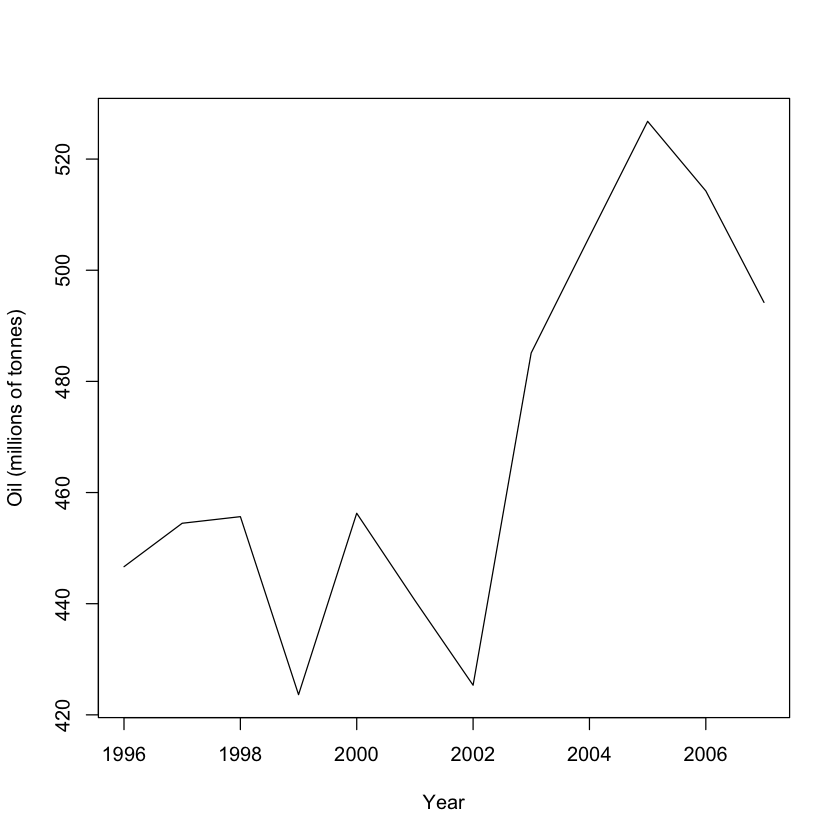

In [1]:
require(fpp)
# Simple exponential smoothing - code from the FPP book

oildata <- window(oil, start = 1996, end = 2007)
plot(oildata, ylab = "Oil (millions of tonnes)", xlab = "Year")

fit1 <- ses(oildata, alpha = 0.2, initial = "simple", h = 3)
fit2 <- ses(oildata, alpha = 0.6, initial = "simple", h = 3)
fit3 <- ses(oildata, h = 3) #note no value for alpha and no initial value.  The algorithm will calculate alpha as part of the optimization.

#what kind of objects are these?
class(fit3)

#what is in them
summary(fit3)


Notice:  we used the SES command and it executed the ETS(A,N,N) command.  ses is just a wrapper for ETS.

Also notice the estimate for alpha.  That came from the optimization. So did the initial state number (447.48)

Let's look at some pictures.




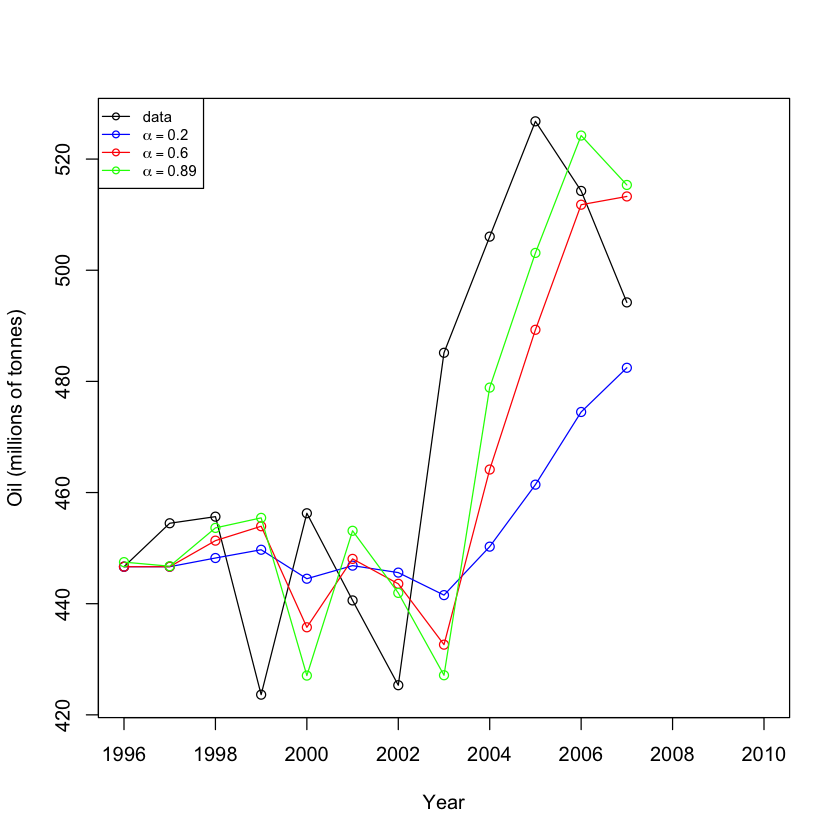

In [2]:
plot(fit1, plot.conf=FALSE, ylab="Oil (millions of tonnes)",
     xlab="Year", main="", fcol="white", type="o")
lines(fitted(fit1), col="blue", type="o")
lines(fitted(fit2), col="red", type="o")
lines(fitted(fit3), col="green", type="o")

legend("topleft",lty=1, col=c(1,"blue","red","green"), cex = 0.75,
       c("data", expression(alpha == 0.2), expression(alpha == 0.6),
         expression(alpha == 0.89)),pch=1)




This just covers our existing data - we've fitted the data with several options for the smoothing parameter.  Notice how flat things get when alpha is really small.

Now let's try forecasting - we're fitting these smoothing methods to data through 2007 but our data really goes through 2010


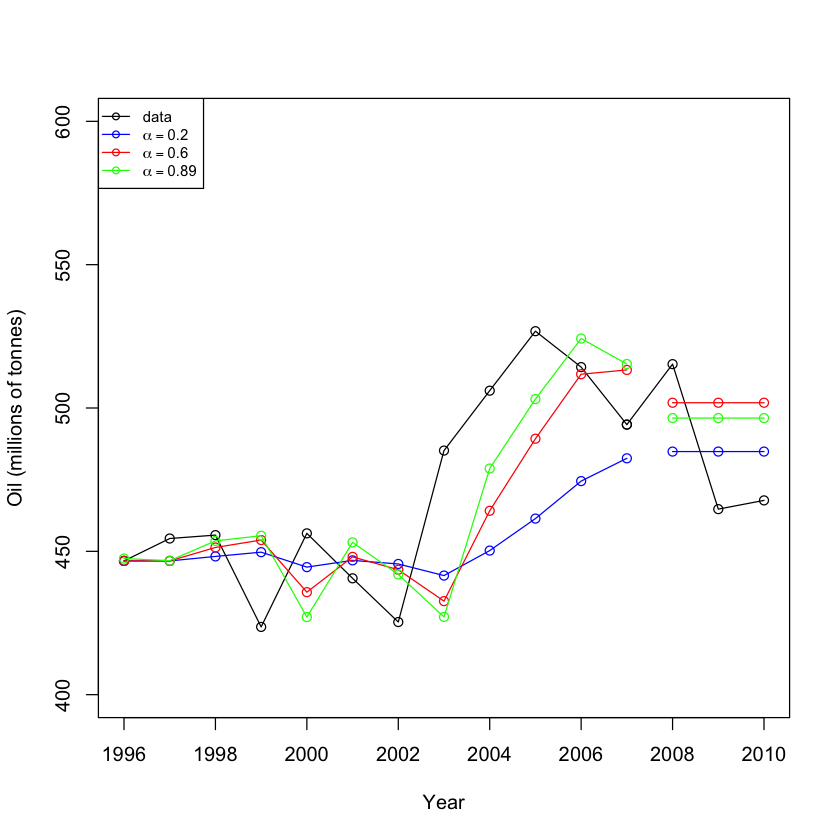

In [3]:
fit1 <- ses(oildata, alpha = 0.2, initial = "simple", h = 3)
fit2 <- ses(oildata, alpha = 0.6, initial = "simple", h = 3)
fit3 <- ses(oildata, h = 3)

plot(fit1, plot.conf=FALSE, ylim = c(400, 600), ylab="Oil (millions of tonnes)",
xlab="Year", main="", fcol="white", type="o")
#this just plots the data through 2007 because that's what we ran the model over
#we have more data but have to plot it seperately if we want to compare the forecast with the actual
# add these lines for putting the actual data past 2007
test.oil <- window(oil, start = 2007)
lines(test.oil, col = "black", type = "o")
lines(fitted(fit1), col="blue", type="o")
lines(fitted(fit2), col="red", type="o")
lines(fitted(fit3), col="green", type="o")
lines(fit1$mean, col="blue", type="o")
lines(fit2$mean, col="red", type="o")
lines(fit3$mean, col="green", type="o")
legend("topleft",lty=1, cex =0.75, col=c(1,"blue","red","green"),
c("data", expression(alpha == 0.2), expression(alpha == 0.6),
expression(alpha == 0.89)),pch=1)

Next set of methods: Holt exponential smoothing.



In [4]:
fith <- holt(oildata, alpha=0.8, beta=0.2, initial="simple", h=3)
class(fith)
summary(fith)
oildata[1]

[1] "forecast"


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(x = oildata, h = 3, initial = "simple", alpha = 0.8, beta = 0.2) 

  Smoothing parameters:
    alpha = 0.8 
    beta  = 0.2 

  Initial states:
    l = 446.6565 
    b = 7.8168 

  sigma:  26.9797
Error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE       ACF1
Training set -1.768733 26.97966 22.20042 -0.526348 4.718622 1.023252 0.03909422

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       505.5729 470.9971 540.1487 452.6938 558.4521
2009       509.9937 455.9846 564.0029 427.3938 592.5936
2010       514.4146 441.8877 586.9414 403.4943 625.3348


[1] 446.6565

Notice that it shows the parameter settings we gave it. We now have a setting for the effect of the trend.  What's the initial value?  It's the first value of the oildata series - because we set the initialization routine = "simple"

Adding these lines to our chart.  What is the effect of adding trend?


In [5]:
lines(fitted(fith), type = "o", col="purple")
lines(fith$mean, col="purple", type="o")
legend("topleft",lty=1, cex = 0.75, col=c(1,"blue","red","green", "purple"),
       c("data", expression(alpha == 0.2), expression(alpha == 0.6),
         expression(alpha == 0.89),"Holt"),pch=1)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet



That was the additive trend model - let's make it muliplicative.


In [ ]:
fith2 <- holt(oildata,alpha=0.8,beta=0.2,initial="simple",exponential=TRUE,h=3)
summary(fith2)

We specified alpha and beta and told it to start with the initial value and the initial trend.

Now add that line to the chart:


In [ ]:
lines(fitted(fith2), col="brown", type = "o")
lines(fith2$mean, col="brown", type="o")
legend("topleft", cex =0.75, lty=1, col=c(1,"blue","red","green", "purple", "brown"),
       c("data", expression(alpha == 0.2), expression(alpha == 0.6),
         expression(alpha == 0.89),"Holt","Exponential"),pch=1)




Let's compare the simple exponential smoothing with the Holt model



In [ ]:
air <- window(ausair,start=1990,end=2004)
fit0 <- ses(air, alpha = 0.8, beta = 0.2,initial = "simple", h=5)
fit1 <- holt(air, alpha=0.8, beta=0.2, initial="simple", h=5)
fit2 <- holt(air,alpha=0.8,beta=0.2,initial="simple",exponential=TRUE,h=5)

fit3 <- holt(air, alpha=0.8, beta=0.2, damped=TRUE, h=5)
fit4 <- holt(air, alpha=0.8, beta=0.2, damped=TRUE, exponential = TRUE, h=5)


# Results for first model:
fit1$model$state
fitted(fit1)
fit1$mean

The forecast object has the fitted and the forecast values as well as the values for the trend and the level.

You can plot those pieces:


In [ ]:
plot(fit2$model$state)


In [ ]:
plot(fit2, type="o", ylab="Air passengers in Australia (millions)",
     xlab="Year", fcol="white", plot.conf=FALSE)
lines(fitted(fit0), col="brown")
lines(fitted(fit1), col="blue")
lines(fitted(fit2), col="red")
lines(fitted(fit3), col="green")
lines(fitted(fit4), col="purple")
lines(fit0$mean, col="brown", type="o")
lines(fit1$mean, col="blue", type="o")
lines(fit2$mean, col="red", type="o")
lines(fit3$mean, col="green", type="o")
lines(fit4$mean, col="purple", type="o")

legend("topleft", lty=1, cex=0.6, col=c("black","brown","blue","red","green", "purple"),
       c("Data","SES", "Holt","Exponent","Additive damped trend", "Mult damped trend"))


So we can see how the forecast differs across various methods.  What is the effect of changing the parameters for any single method?


In [ ]:


livestock2 <- window(livestock,start=1970,end=2000)
fit1 <- holt(livestock2,alpha = 0.8, beta = .1)
fit2 <- holt(livestock2, alpha = .6, beta = .1)
fit3 <- holt(livestock2,alpha = .4, beta = .1)



plot(fit3, type="o", ylab="Livestock, sheep in Asia (millions)", ylim = c(250, 475),
     flwd=1, plot.conf=FALSE, xlab = "beta = 0.1")
lines(window(livestock,start=2001),type="o")
lines(fit1$mean,col=2)
lines(fit2$mean,col=3)

legend("topleft", cex = 0.75, lty=1, pch=1, col=1:4,
       c("Data","Alpha = 0.8","Alpha = 0.4","Alpha = 0.2"))



Trend parameter:


In [ ]:

livestock2 <- window(livestock,start=1970,end=2000)
fit1 <- holt(livestock2,alpha = 0.8, beta = .1)
fit2 <- holt(livestock2, alpha = .8, beta = .5)
fit3 <- holt(livestock2,alpha = .8, beta = .7)



plot(fit3, type="o", ylab="Livestock, sheep in Asia (millions)", ylim = c(250, 475),
     flwd=1, plot.conf=FALSE, xlab = "alpha = .8")
lines(window(livestock,start=2001),type="o")
lines(fit1$mean,col=2)
lines(fit2$mean,col=3)

legend("topleft", cex = 0.75, lty=1, pch=1, col=1:4,
       c("Data","Beta = 0.1","Beta = 0.5","Beta = 0.7"))





HW Seasonal models
Let's look at Tourists to Australia


In [ ]:
aust <- window(austourists,start=2005)
fit1hw <- hw(aust,seasonal="additive")
fit2hw <- hw(aust,seasonal="multiplicative")
fit3hw <- hw(aust,seasonal="additive", damped = TRUE)

plot(fit2hw,ylab="International visitor night in Australia (millions)",
     plot.conf=FALSE, type="o", fcol="white", xlab="Year")
lines(fitted(fit1hw), col="red", lty=2)
lines(fitted(fit2hw), col="green", lty=2)
lines(fit1hw$mean, type="o", col="red")
lines(fit2hw$mean, type="o", col="green")
legend("topleft",lty=1, cex = 0.75, pch=1, col=1:3,
  c("data","Holt Winters' Additive","Holt Winters' Multiplicative"))

We can pull the different pieces out of the forecast object and compare them across specifications.  What's the difference between additive seasonal and multiplicative seasonal?



In [ ]:
states <- cbind(fit1hw$model$states[,1:3],fit2hw$model$states[,1:3])
colnames(states) <- c("level","slope","seasonal","level","slope","seasonal")
plot(states, xlab="Year", main = "Comparing Additive and Multiplicative Seasonals")


Let's revisit the oil data - we originally used the SES model on it which is equivalent to ETS(A,N,N)



In [ ]:
oildata <- window(oil, start = 1996, end = 2007)
fita <- ets(oildata, model = "ANN")
plot(forecast(fita, h=3), ylab="Oil (millions of tonnes)")
summary(fita)
ls(fita)  #list names of the objects in the specified environment
fita$par



What if we used the ETS(M,N,N) model?



In [ ]:
oildata <- window(oil, start = 1996, end = 2007)
fitm <- ets(oildata, model = "MNN")
plot(forecast(fitm, h=3), ylab="Oil (millions of tonnes)")
summary(fitm)
ls(fitm)  #list names of the objects in the specified environment
fitm$par


But are either of these the right model for these data?  What if we let the ETS code decide?



In [ ]:
oildata <- window(oil, start = 1996, end = 2007)
fit <- ets(oildata)
summary(fit)
plot(fit)
plot(forecast(fit, h = 8), ylab = "Oil (millions of tonnes)")




The model chose additive.  Compare the AIC for the two we examined.



In [ ]:
fita$aic
fitm$aic

Yup - the AIC for the additive model is lower so it is the "better" model

How about a more interesting example?
Remember the Australian visitors data?


In [ ]:
aust <- window(austourists,start=2005)
plot(aust, main = "International visitor night in Australia", ylab = "Millions")

Very strongly seasonal.  Probably not a good candidate for the ETS(A,N,N) model.  Let's see:



In [ ]:
fit <- ets(aust)
summary(fit)

plot(fit)

plot(forecast(fit, h = 8), ylab = "Millions")



The winner is multiplicative errors, no trend, no seasonality.


What about our ubiquitous air passengers data?


In [ ]:
ap <- window(AirPassengers, start = 1949, end = 1958)
fit <- ets(ap)
summary(fit)

plot(fit)

plot(forecast(fit, h = 8), ylab = "Millions")




Same thing.
